<a href="https://colab.research.google.com/github/yarlidata/dataengineering/blob/main/SCD_Type_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tracking Customer Changes in a Data Warehouse with SCD Type 2 Dimension

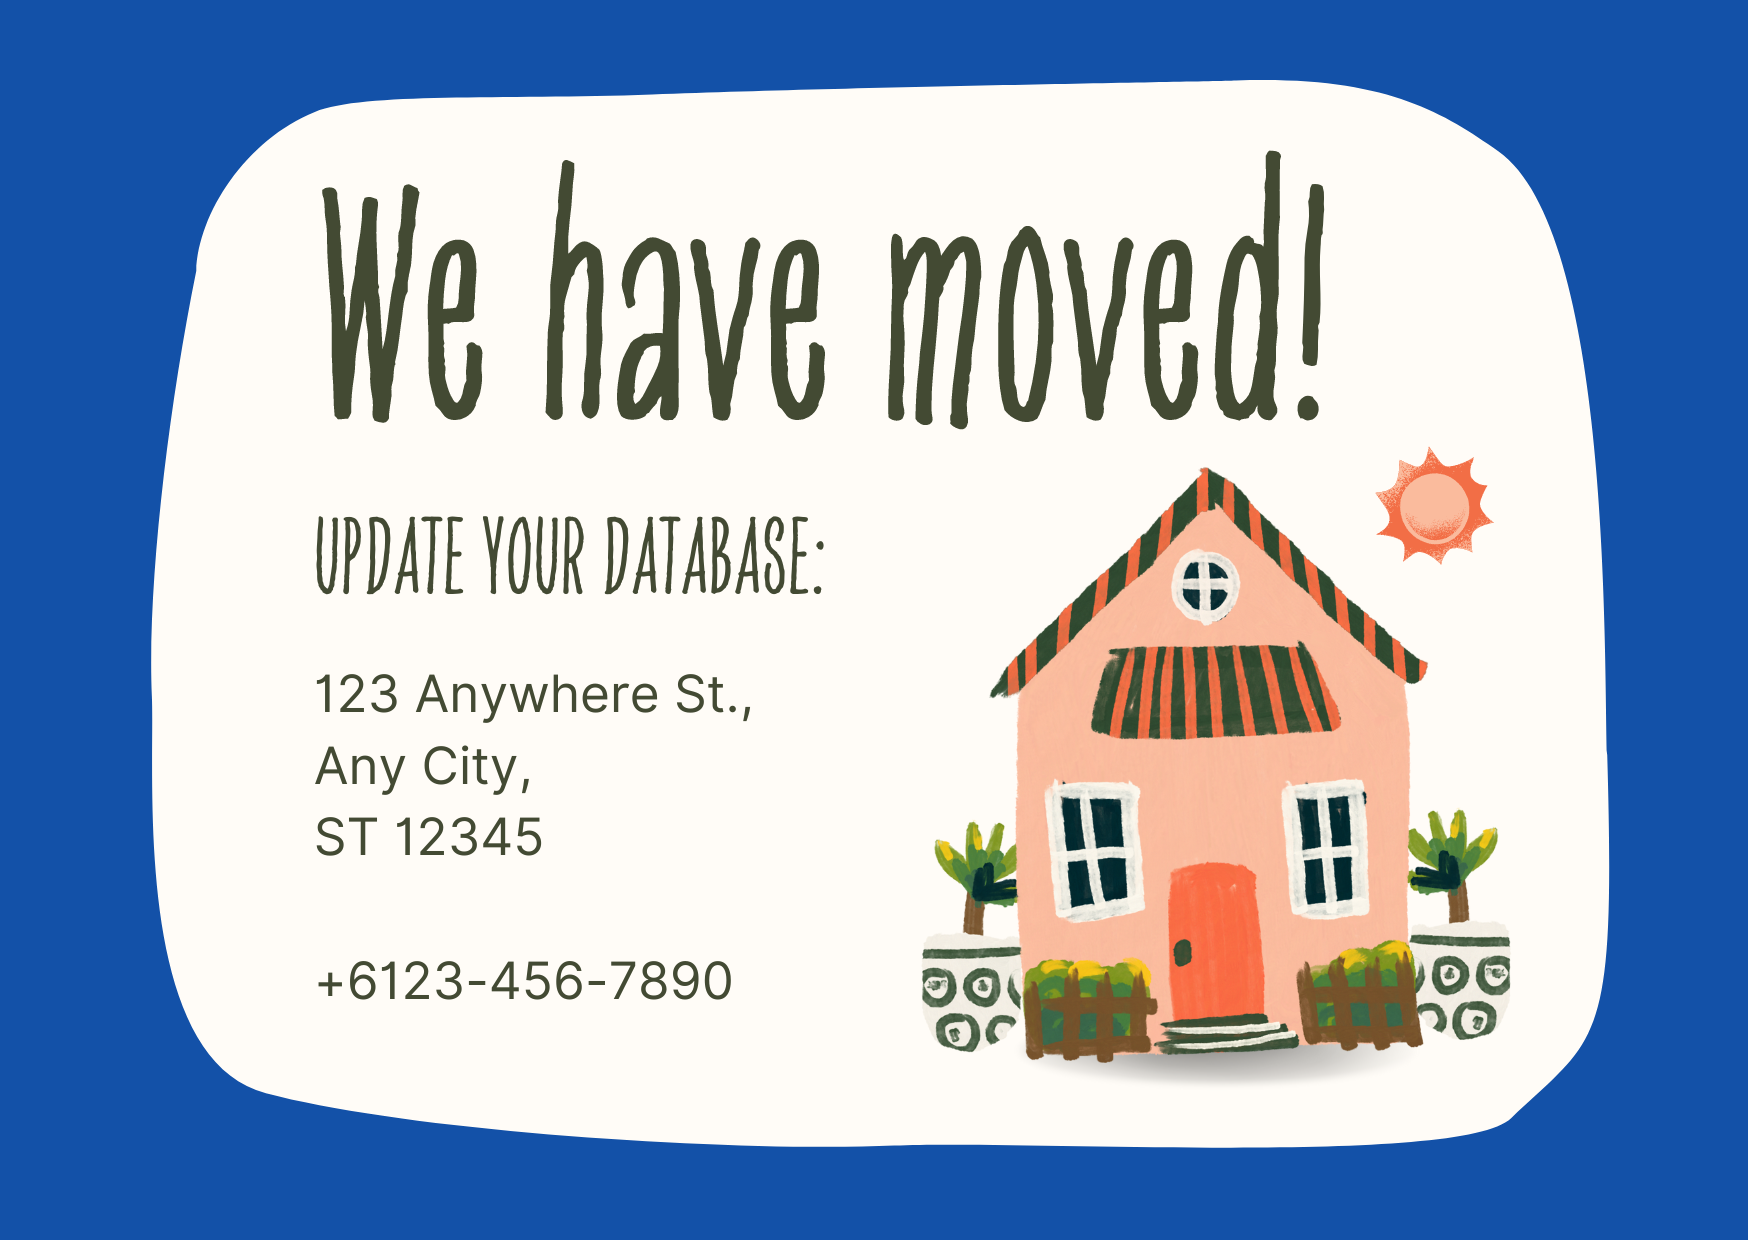


Imagine you’re running a local retail store called “Aussie Retail”, and over the years, your loyal customers sometimes change their addresses, phone numbers, or other details. As a business owner, you want to track these changes accurately to understand customer behaviour and maintain historical records. This is where Slowly Changing Dimensions (SCD) Type 2 comes into play.

In this blog, we'll dive into what SCD Type 2 is, why it's essential for data warehousing, and how you can implement it using Python and pandas. We’ll use a simple dataset to keep things easy to follow.



#Understanding SCD Type 2

Slowly Changing Dimensions Type 2 (SCD Type 2) is a technique used in data warehousing to manage and track changes in dimension data over time. Unlike SCD Type 1, which overwrites old data, SCD Type 2 retains historical records by creating new rows for each change. This method ensures we have a complete history of data changes, allowing for accurate historical analysis.

#Key Concepts of SCD Type 2:


1.   **Historical Data Retention**: Keeps all historical records, providing a full audit trail.

2.   **New Rows for Changes**: Each change results in a new row, preserving the old record.
3.   **Surrogate Keys**: Unique identifiers to distinguish between different versions of the same record.
4.   **Validity Tracking**: Columns to track the start and end dates of each record's validity.

#A Simple Example

Let's use a simple example to illustrate how SCD Type 2 works. We'll track customer address changes in our Aussie Retail store. We are using Using Python and pandas library.

##Initial Data

Here's our initial customer data:

In [10]:

import pandas as pd
from datetime import datetime

# Initial customer data
data = {
    'CustomerID': [1, 2],
    'Name': ['John Doe', 'Jane Roe'],
    'Address': ['123 Main St', '456 High St'],
    'EffectiveDate': [datetime(2023, 1, 1), datetime(2023, 1, 1)],
    'ExpirationDate': [None, None],
    'CurrentFlag': [True, True]
}

# Create DataFrame
df = pd.DataFrame(data)
df.head()

,CustomerID,Name,Address,EffectiveDate,ExpirationDate,CurrentFlag
0,1,John Doe,123 Main St,2023-01-01,None,True
1,2,Jane Roe,456 High St,2023-01-01,None,True


This will give us our initial DataFrame.
##Step 2: Handling an Address Change

Let’s say John Doe moves to a new address, "789 Elm St", on 2024-01-01. We need to update our DataFrame to reflect this change while preserving the historical record.

Mark the old record as expired:
Insert a new record with the updated address:

```
# This is formatted as code
```


Here’s the code to achieve this:



In [12]:
# New address information for John Doe
customer_id = 1
new_address = '789 Elm St'
change_date = datetime(2024, 1, 1)

# Mark the old record as expired
df.loc[(df['CustomerID'] == customer_id) & (df['CurrentFlag'] == True), 'ExpirationDate'] = change_date
df.loc[(df['CustomerID'] == customer_id) & (df['CurrentFlag'] == True), 'CurrentFlag'] = False

# Add new record with updated address
new_record = {
    'CustomerID': customer_id,
    'Name': 'John Doe',
    'Address': new_address,
    'EffectiveDate': change_date,
    'ExpirationDate': None,
    'CurrentFlag': True
}

df = pd.concat([df, pd.DataFrame([new_record])], ignore_index=True)
df.head()

,CustomerID,Name,Address,EffectiveDate,ExpirationDate,CurrentFlag
0,1,John Doe,123 Main St,2023-01-01,2024-01-01 00:00:00,False
1,2,Jane Roe,456 High St,2023-01-01,None,True
2,1,John Doe,789 Elm St,2024-01-01,2024-01-01 00:00:00,False
3,1,John Doe,789 Elm St,2024-01-01,None,True


We’ve successfully implemented SCD Type 2. John Doe’s old address is preserved, and his new address is recorded with a new row.

##Step 3: Querying Historical Data

One of the main benefits of SCD Type 2 is the ability to query historical data. Let’s see how we can extract different versions of a customers' data


In [13]:
# Function to get customer history
def get_customer_history(customer_id):
    return df[df['CustomerID'] == customer_id]

# Get John Doe's history
john_doe_history = get_customer_history(1)
john_doe_history
#This will output all records for John Doe:


,CustomerID,Name,Address,EffectiveDate,ExpirationDate,CurrentFlag
0,1,John Doe,123 Main St,2023-01-01,2024-01-01 00:00:00,False
2,1,John Doe,789 Elm St,2024-01-01,2024-01-01 00:00:00,False
3,1,John Doe,789 Elm St,2024-01-01,None,True


We can see both the old and new addresses, along with their validity periods.

##Step 4: Querying Current Data

To get only the current records, we can filter by the CurrentFlag column.



In [8]:
# Get current customer data
current_data = df[df['CurrentFlag'] == True]
current_data
#This will give us:

,CustomerID,Name,Address,EffectiveDate,ExpirationDate,CurrentFlag
1,2,Jane Roe,456 High St,2023-01-01,None,True
2,1,John Doe,789 Elm St,2024-01-01,None,True


We now have a snapshot of the current state of our customers’ addresses.

##Benefits of Using SCD Type 2

Implementing SCD Type 2 in a data warehouse brings several benefits:

1.   **Historical Accuracy**: All changes are tracked, providing a complete historical record.
2.   **Data Integrity**: Ensures that all versions of a record are preserved, maintaining data integrity.
3.   **Audibility**: The ability to track changes over time offers clear audit trails.
4.   **Enhanced Analysis**: Facilitates time-based analysis, enabling better decision-making.

##Challenges and Considerations

While SCD Type 2 is powerful, it also comes with challenges:



1.   **Increased Storage**: More rows are added for each change, potentially leading to significant data growth.
2.   **Complexity**: Managing and querying SCD Type 2 dimensions can be complex.
3.   **Performance**: The additional rows and the need to manage validity periods can impact query performance.


In this notebook, we've explored the concept of Slowly Changing Dimensions Type 2 and how it helps in tracking changes in data dimension over time. Using a simple example, we demonstrated how to implement SCD Type 2 using Python and Pandas, preserving historical data while capturing changes.

At Aussie Retail, tracking customer changes accurately ensures that we maintain a complete history, enabling better customer insights and decision-making. While SCD Type 2 adds complexity and storage overhead, its benefits in maintaining data integrity and providing a comprehensive audit trail make it a valuable approach in data warehousing.

Implementing SCD Type 2 may seem daunting initially, but with the right tools and techniques, it becomes manageable and incredibly rewarding. So, the next time a customer like John Doe moves to a new address, you’ll be well-prepared to track that change efficiently and accurately.